# Implementing MLPs with Keras

## Building Image Classifier Using Sequential API

In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Load Fashion MNIST database (70,000 grayscale images of 28 × 28 pixels each, 10 classes)

In [85]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [86]:
X_train.shape

(55000, 28, 28)

In [87]:
X_train.dtype

dtype('uint8')

### Scale pixel intensities down to [0–1] range by dividing them by 255.0 (this also converts them to floats)

In [88]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

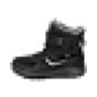

In [89]:
plt.rcParams["figure.figsize"] = (1, 1)
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [90]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [91]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [92]:
class_names[y_train[0]]

'Ankle boot'

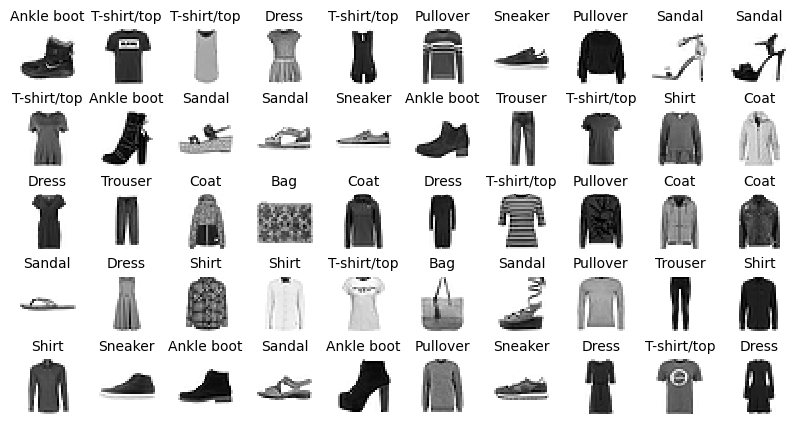

In [93]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1, n_rows * 1))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=10)
plt.subplots_adjust(wspace=0.25, hspace=0.5)

plt.show()

## Creating the model using Sequential API

In [94]:
tf.random.set_seed(10)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [95]:
tf.keras.backend.clear_session()
tf.random.set_seed(10)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
model.layers

In [98]:
hidden0 = model.layers[0]
hidden0.name

'flatten'

In [99]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [100]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [101]:
hidden3 = model.layers[3]
hidden3.name

'dense_2'

In [102]:
model.get_layer('dense') is hidden1

True

In [103]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02878062, -0.05095399,  0.00197969, ..., -0.06808125,
         0.03611802,  0.03374981],
       [ 0.01698009,  0.00839946, -0.00984245, ...,  0.05507044,
         0.05515571, -0.07379671],
       [ 0.00160618,  0.06719527, -0.05815458, ...,  0.06685223,
         0.04392109,  0.06527716],
       ...,
       [-0.04653389,  0.06166622,  0.01478676, ...,  0.07295652,
        -0.01009339, -0.00341542],
       [-0.01474014, -0.04894067,  0.01375159, ..., -0.0578551 ,
        -0.03427202, -0.06642436],
       [ 0.04312335,  0.07011254,  0.01447398, ...,  0.07202621,
         0.03047635, -0.00975399]], dtype=float32)

In [104]:
weights.shape

(784, 300)

In [105]:
biases


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [106]:
biases.shape

(300,)

## Compiling the model

In [107]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [108]:
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [109]:
# Convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [110]:
# Convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

## Training and evaluating the model

In [111]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 789us/step - loss: 0.7258 - accuracy: 0.7603 - val_loss: 0.5214 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 1s 749us/step - loss: 0.4914 - accuracy: 0.8294 - val_loss: 0.4900 - val_accuracy: 0.8274
Epoch 3/30
1719/1719 [==============================] - 1s 757us/step - loss: 0.4486 - accuracy: 0.8432 - val_loss: 0.4269 - val_accuracy: 0.8484
Epoch 4/30
1719/1719 [==============================] - 1s 707us/step - loss: 0.4177 - accuracy: 0.8548 - val_loss: 0.4071 - val_accuracy: 0.8558
Epoch 5/30
1719/1719 [==============================] - 1s 722us/step - loss: 0.3982 - accuracy: 0.8601 - val_loss: 0.3912 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 1s 726us/step - loss: 0.3808 - accuracy: 0.8660 - val_loss: 0.4061 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 1s 749us/step - loss: 0.3671 - accuracy: 0.8709 - val_loss: 0.3720 -

In [112]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [113]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


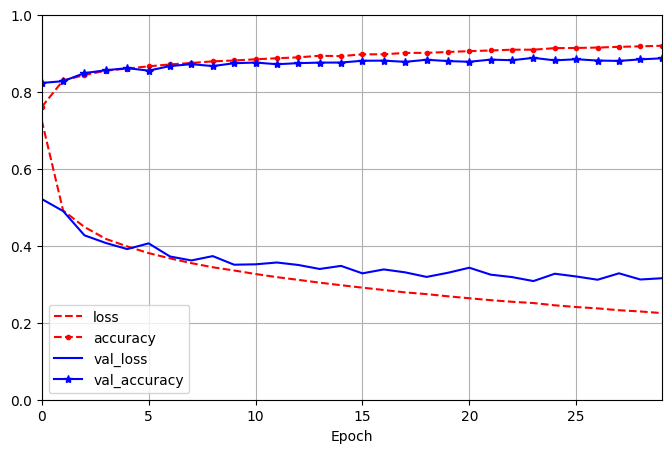

In [114]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

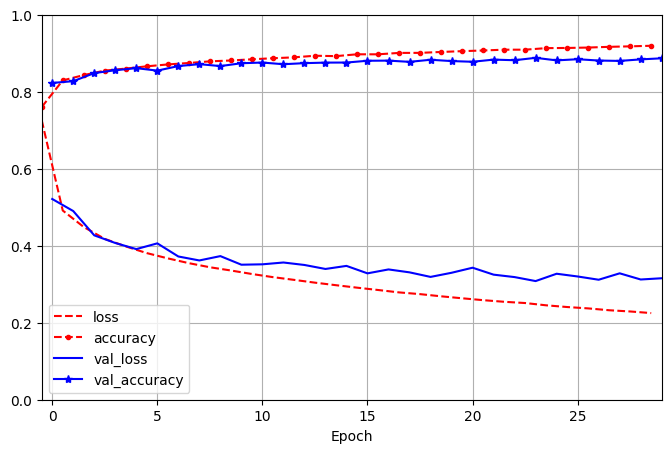

In [115]:
# Shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [116]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 517us/step - loss: 0.3346 - accuracy: 0.8814


[0.33455267548561096, 0.8813999891281128]

## Using the model to make predictions

In [117]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 37ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [118]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [119]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [120]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

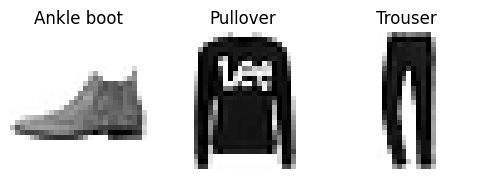

In [121]:
plt.figure(figsize=(6, 2))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()